# Colorspaces

Let's have a brief introduction into converting to different colorspaces! The video goes into more detail about colorspaces.

Quick Info Link: 
https://en.wikipedia.org/wiki/HSL_and_HSV


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../DATA/00-puppy.jpg')

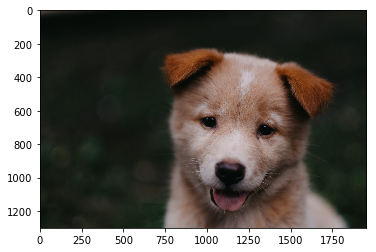

In [2]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

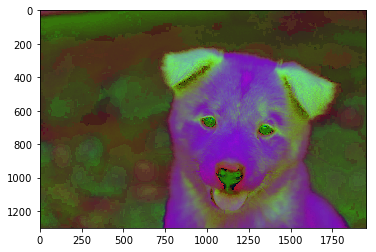

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)

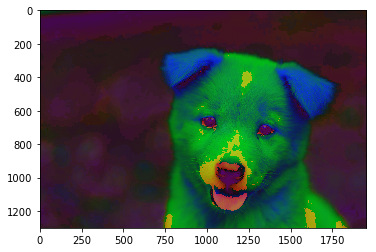

In [4]:
img = cv2.imread('../DATA/00-puppy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(img)

# Blending and Pasting Images

For some computer vision systems, we'll want to be able to post our own image on top of an already existing image or video. We may also want to blend images, maybe we want to have a "highlight" effect instead of just a solid box or empty rectangle.

Let's explore what is commonly known as **Arithmetic Image Operations** with OpenCV. These are referred to as Arithmetic Operations because OpenCV is simply performing some common math with the pixels for the final effect. We'll see a bit of this in our code.

## Blending Images

Blending Images is actually quite simple, let's look at a simple example.

In [3]:
import cv2
import matplotlib.pyplot as plt

# Two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [6]:
img1.shape

(1401, 934, 3)

In [8]:
img2.shape

(1280, 1277, 3)

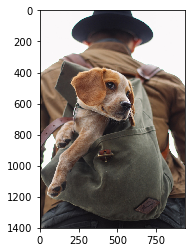

In [9]:
plt.imshow(img1)

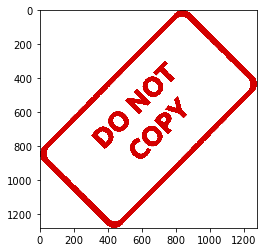

In [10]:
plt.imshow(img2)

In [12]:
# Resizing the Images
# Let's practice resizing the image, since the DO NOT COPY image is actually quite large 1200 by 1200, and our puppy in backpack image is 1400 by 1000

img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

# If size not equal we will get error

### Blending the Image

We will blend the values together with the formula:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

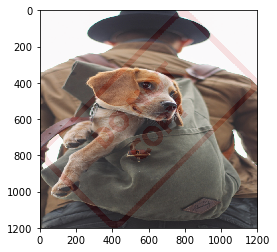

In [15]:
blended = cv2.addWeighted(src1=img1,alpha=0.9,src2=img2,beta=0.1,gamma=0)
plt.imshow(blended)

## Overlaying Images of Different Sizes

We can use this quick trick to quickly overlap different sized images, by simply reassigning the larger image's values to match the smaller image.

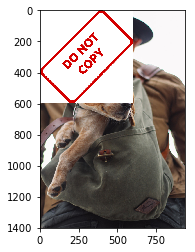

In [4]:
# Load two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')                    
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

x_offset,y_offset=0,0
x_end,y_end = x_offset+small_img.shape[1], y_offset+small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img  

plt.imshow(large_img)

## Blending Images of Different Sizes

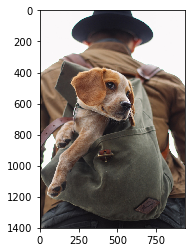

In [6]:
import numpy as np
import cv2

# Load two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img1)

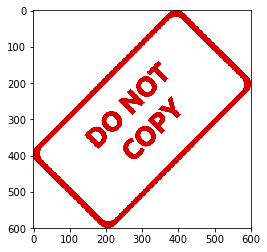

In [18]:
plt.imshow(img2)

In [19]:
# Create a Region of Interest (ROI)
img1.shape

(1401, 934, 3)

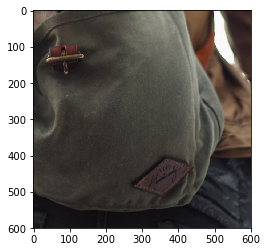

In [7]:
x_offset=934-600
y_offset=1401-600

# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER

plt.imshow(roi)

In [21]:
roi.shape

(600, 600, 3)

In [8]:
# Creating a Mask

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

img2gray.shape


(600, 600)

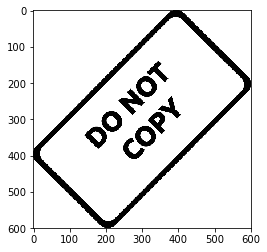

In [23]:
plt.imshow(img2gray,cmap='gray')

(600, 600)

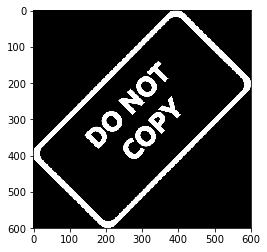

In [9]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')
mask_inv.shape

In [26]:
# Convert Mask to have 3 channels

white_background = np.full(img2.shape, 255, dtype=np.uint8)
#plt.imshow(white_background)
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

bk.shape

(600, 600, 3)

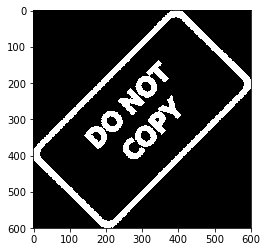

In [27]:
plt.imshow(bk)

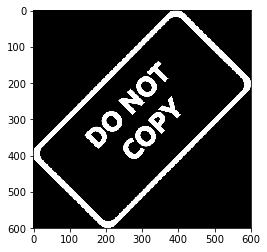

In [28]:
# Grab Original FG image and place on top of Mask

plt.imshow(mask_inv,cmap='gray')

(600, 600, 3)

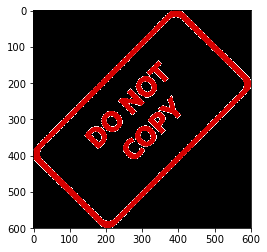

In [30]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)
fg.shape

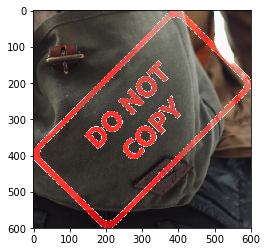

In [33]:
# Get ROI and blend in the mask with the ROI

final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

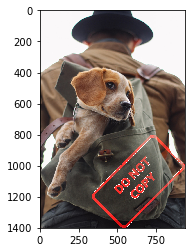

In [34]:
# Now add in the rest of the image

large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)

Check out these documentation examples and links for more help for these kinds of tasks (which can be really tricky!)

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

# Image Thresholding

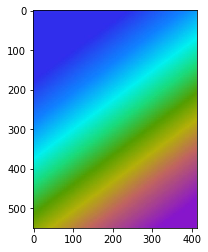

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../DATA/rainbow.jpg')
plt.imshow(img)

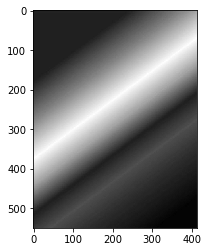

In [11]:
# Adding the 0 flag to read it in black and white
img_gray = cv2.imread('../DATA/rainbow.jpg',0)
plt.imshow(img_gray,cmap='gray')

# Different Threshold Types

<a  href="https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html">https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html<a/>

### Binary

In [14]:
# 255/2 = 127.5
# img.max() = 214

ret,thesh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY) # cv2.THRESH_BINARY_INV

ret

127.0

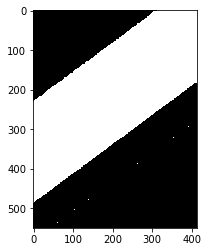

In [17]:
plt.imshow(thesh1,cmap='gray')

### Binary Inverse

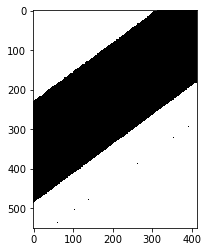

In [19]:
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

### Threshold Truncation

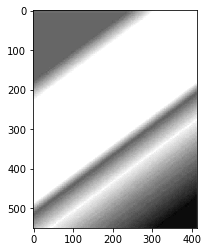

In [21]:
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')

### Threshold to Zero

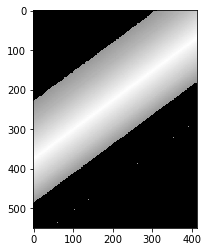

In [23]:
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO) # cv2.THRESH_TOZERO_INV
plt.imshow(thresh4,cmap='gray')

# Real World Applications

## Adaptive Thresholding



### Sudoku Image

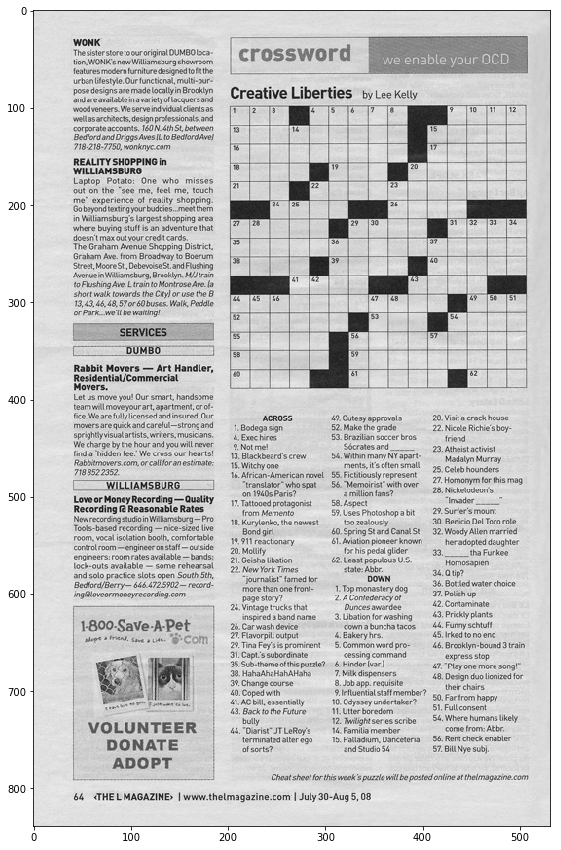

In [30]:
img = cv2.imread("../DATA/crossword.jpg",0)

def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    
show_pic(img)

## Simple Binary


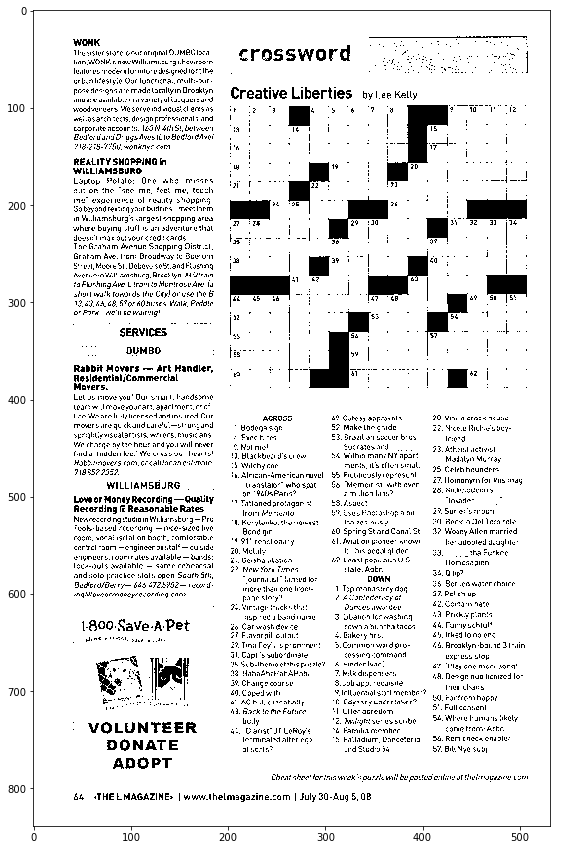

In [31]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
show_pic(th1)

### Adaptive Threshold

https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion

    @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
    .   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
    .   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
    .   see #ThresholdTypes.
    .   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
    .   pixel: 3, 5, 7, and so on.
    .   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
    .   is positive but may be zero or negative as well.

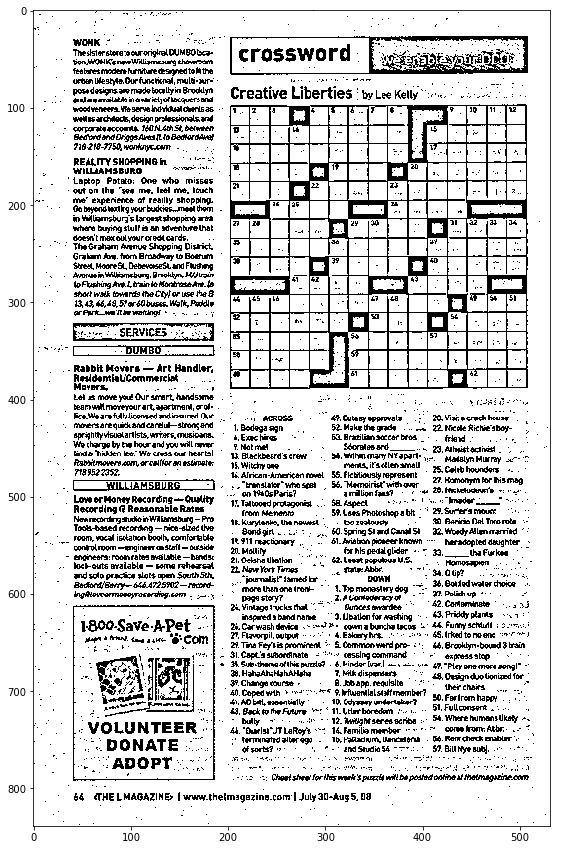

In [32]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) # Play around with these last 2 numbers
show_pic(th2)

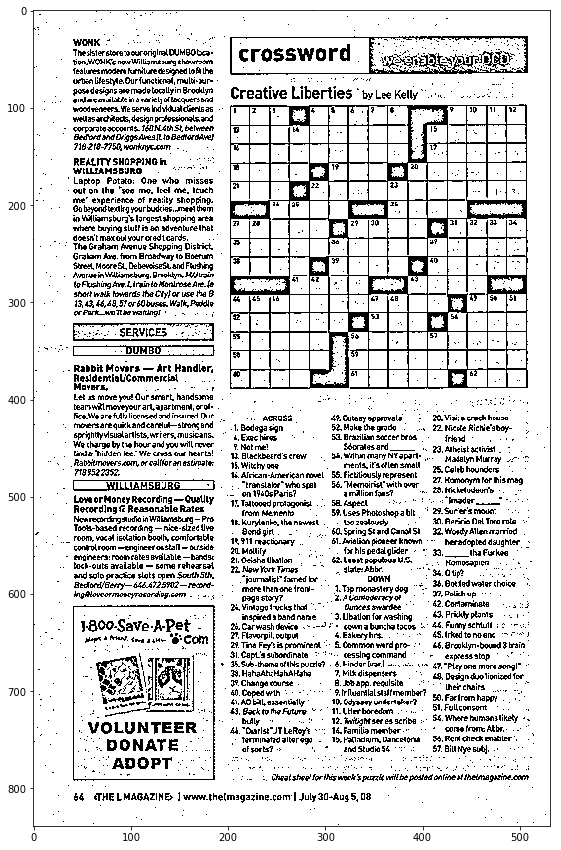

In [33]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,8)
show_pic(th3)

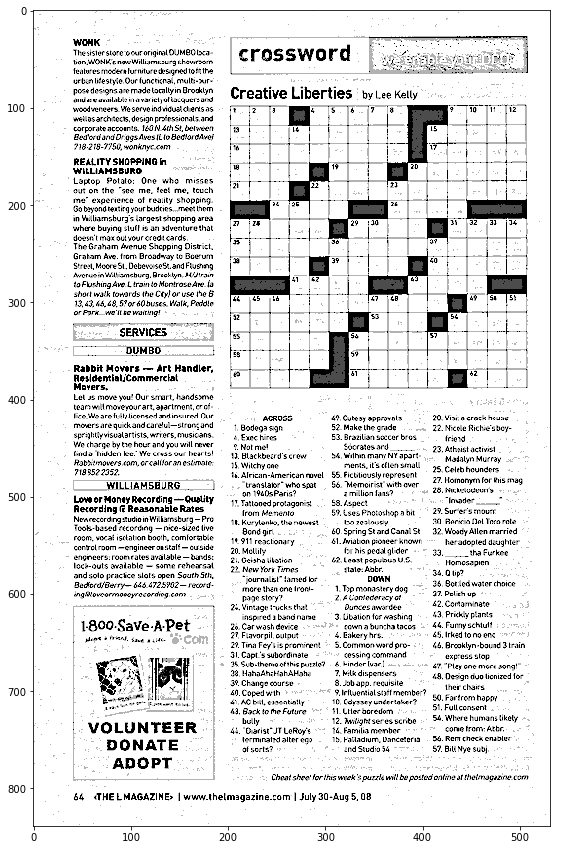

In [34]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
show_pic(blended)